# Grid
This section covers the two supported grids (HexGrid and SquareGrid) for drawing patterns. Both draw patterns with some grid and inherit functions from Grid to render them as a png.

## Imports
For this example, the patterns from [Pattern Variant](PatternVariant.ipynb) will be used as well as the color palettes from [Palettes](Palettes.ipynb).

In [1]:
from IPython.display import display, Image
from IPython.utils import io
with io.capture_output() as captured:
    %run Palettes.ipynb
    %run PatternVariant.ipynb

## Hex Grid
This grid is the easiest to explain as it is simply a hexagonal grid (like the one in game) upon which the patterns are rendered. To create one, you simply provide a list of [PatternVariant](PatternVariant.ipynb) and then a max_width. This max width is the maximum width (in grid points) of the grid before wrapping around to the next line.

max width: 15


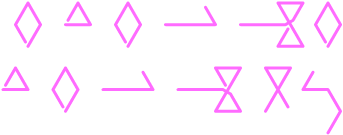

max width: 20


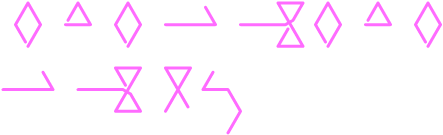

max width: 25


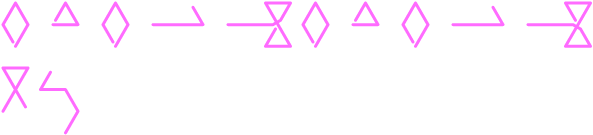

max width: 30


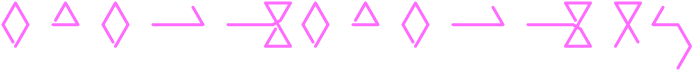

In [2]:
from hex_renderer_py import GridOptions, GridPatternOptions, Point, Lines, Intersections, HexGrid

monocolor = GridOptions(
    line_thickness=0.12,
    pattern_options=GridPatternOptions.Uniform(
        intersections=Intersections.Nothing(),
        lines=Lines.Monocolor(
            color=palettes["default"][0],
            bent= True
        )
    ),
    center_dot=Point.None_()
)

for max_width in range(15,31,5):
    
    grid = HexGrid(example_patterns, max_width)

    print("max width:", max_width)
    
    display(Image(data=bytes(grid.draw_png(25, monocolor))))

## Square Grid
The Square Grid draws every pattern in a grid of tiles (or squares). All tiles are the same size and the patterns are scaled to fit. The width is the maximum number of tiles before going to the next line. max_scale is a percentage to control the maximum a pattern can be upscaled. For instance, a small pattern might be upscaled to be too large so max_scale allows that to be maxed out. Lastly, x_pad and y_pad is the amount of space (in tiles) between each tile.

In [3]:
from hex_renderer_py import GridOptions, GridPatternOptions, Point, Lines, Intersections, SquareGrid

monocolor = GridOptions(
    line_thickness=0.12,
    pattern_options=GridPatternOptions.Uniform(
        intersections=Intersections.Nothing(),
        lines=Lines.Monocolor(
            color=palettes["default"][0],
            bent= True
        )
    ),
    center_dot=Point.None_()
)

d_max_width = 12
d_max_scale = 0.5
d_x_y_pad = 0.2

scale = 40

### Max Width

Max Width: 4


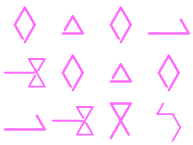

Max Width: 6


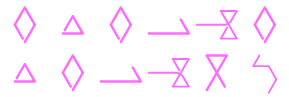

Max Width: 8


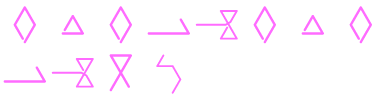

Max Width: 10


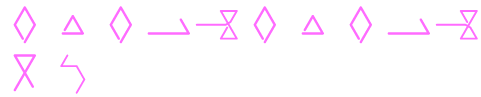

Max Width: 12


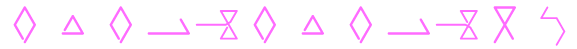

In [4]:
for max_width in range(4,13,2):
    grid = SquareGrid(example_patterns, max_width, d_max_scale, d_x_y_pad, d_x_y_pad)

    print("Max Width:", max_width)
    display(Image(data=bytes(grid.draw_png(scale, monocolor))))

### Max Scale

Max Scale: 0.4


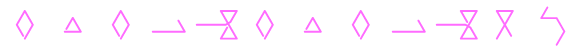

Max Scale: 0.6


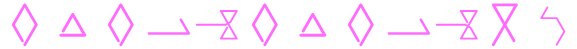

Max Scale: 0.8


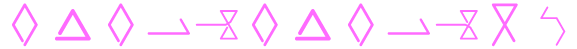

Max Scale: 1.0


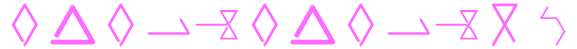

In [5]:
for max_scale in range(4, 11, 2):
    grid = SquareGrid(example_patterns, d_max_width, max_scale/10, d_x_y_pad, d_x_y_pad)

    print("Max Scale:", max_scale/10)
    display(Image(data=bytes(grid.draw_png(scale, monocolor))))

### X/Y Pad
To further show off the y_pad, the max_width was set to 6 for this example.

X/Y Pad: 0.5


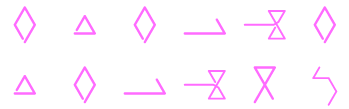

X/Y Pad: 0.6


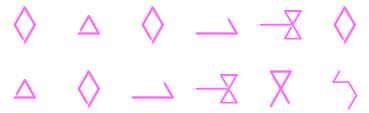

X/Y Pad: 0.7


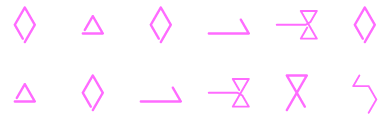

X/Y Pad: 0.8


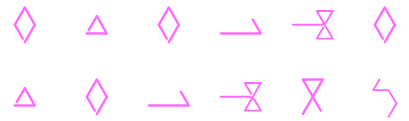

X/Y Pad: 0.9


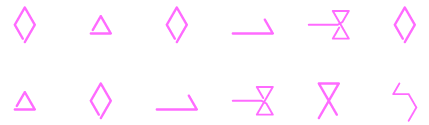

X/Y Pad: 1.0


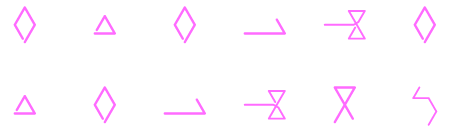

In [6]:
for x_y_pad in range(5, 11, 1):
    max_width = 6
    grid = SquareGrid(example_patterns, max_width, d_max_scale, x_y_pad/10, x_y_pad/10)

    print("X/Y Pad:", x_y_pad/10)
    display(Image(data=bytes(grid.draw_png(scale, monocolor))))